# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import pandas as pd

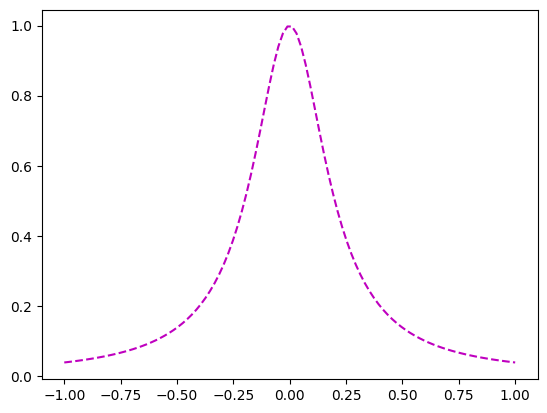

In [ ]:
f = lambda x: 1/(1+25*x**2)
x= np.linspace(-1,1,100)

plt. plot(x,f(x), 'm--')

In [ ]:
N= 4
n= N+1
x_ = np.linspace(-1,1,n) #puntos a interpolar
PL = lagrange(x_, f(x_)) #funcion de interpolacion
xL = np.linspace(np.min(x_), np.max(x_))

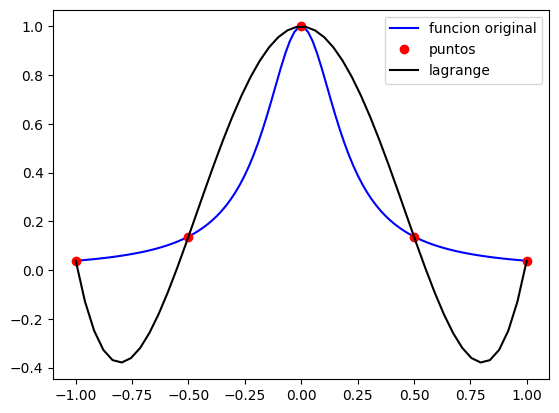

In [ ]:
plt.plot(x,f(x), 'b-', label = 'funcion original')
plt.plot(x_,f(x_), 'ro', label='puntos')
plt.plot(xL,PL(xL), 'k-', label= 'lagrange')
plt.legend()

In [ ]:
import sympy as sp
sp.init_printing()

f_s= lambda y: 1/(1+25*y**2)
y= sp.symbols('y')
f_s(y)

    1    
─────────
    2    
25⋅y  + 1

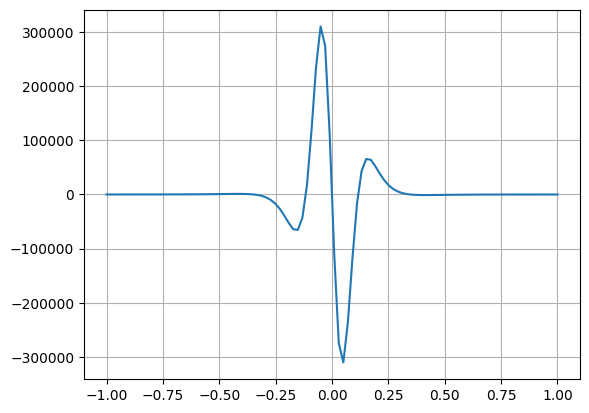

In [ ]:
df5= sp.diff(f_s(y),y,5)
f5= sp.lambdify(y, df5,'numpy')

x5= np.linspace(-1,1,100)
plt.plot(x5,f5(x5))
plt.grid()
plt.show()

x_max= np.max(abs(f5(x5)))
x_zeta= np.argmax(abs(f5(x5)))


In [ ]:
import math as mt

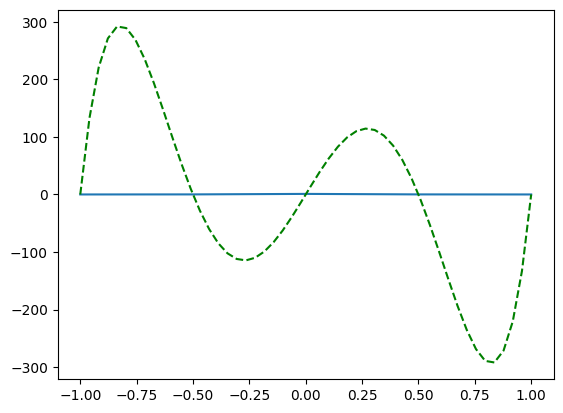

In [ ]:
plt.plot(x_,f(x_))
plt.plot(xL, x_max/(mt.factorial(n))*(xL-x_[0])*(xL-x_[1])*(xL-x_[2])*(xL-x_[3])*(xL-x_[4]), 'g--')

##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

[-1.         -0.66817864 -0.41421356 -0.19891237  0.          0.19891237
  0.41421356  0.66817864  1.        ]


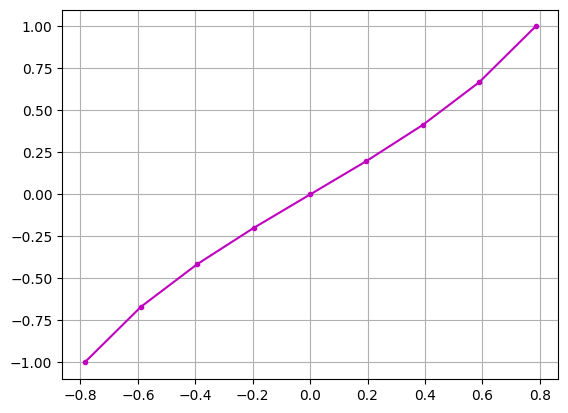

In [ ]:
func= lambda x: np.tan(x)
x=np.linspace(-np.pi/4,np.pi/4,9)
print(func(x))

plt.plot(x,func(x), 'm.-')
plt.grid()
plt.show()

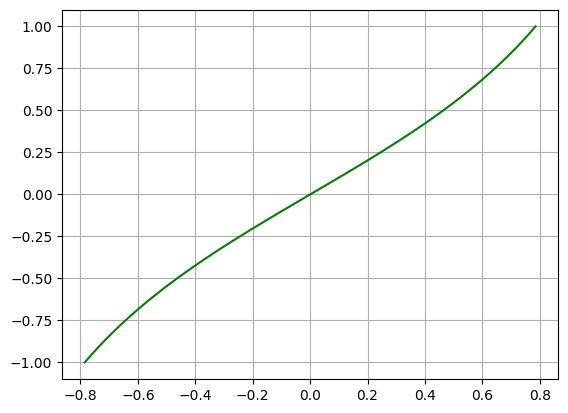

In [ ]:
N= 9
n= N+1
xs = np.linspace(-np.pi/4,np.pi/4, n) #puntos a interpolar
PoliL = lagrange(xs, func(xs)) #funcion de interpolacion
xL = np.linspace(np.min(xs), np.max(xs))

plt.plot(xL, PoliL(xL), 'g-')
plt.grid()

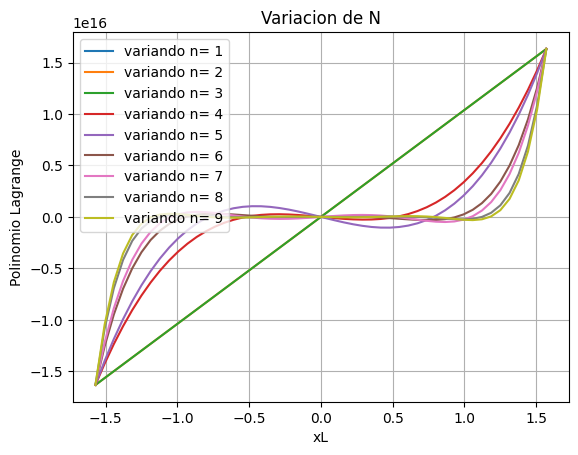

In [ ]:
#varinado el numero de datos utilizados
for i in range(1,10):
    x=np.linspace(-np.pi/2,np.pi/2, i)
    PoliL = lagrange(x, func(x))
    xL = np.linspace(np.min(x), np.max(x))
    plt.plot(xL, PoliL(xL), '-', label=f"variando n= {i}")
    plt.title('Variacion de N')
    plt.xlabel('xL')
    plt.ylabel('Polinomio Lagrange')
    plt.legend()
    plt.grid()


##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


In [ ]:
#a)
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

dat = {'x': x, 'f(x)': fx}
df= pd.DataFrame(dat)
df

,x,f(x)
0,1.0,0.765198
1,1.3,0.620086
2,1.6,0.455402
3,1.9,0.281819
4,2.2,0.110362


In [ ]:
new_x_range = np.arange(1.1, 2.1, 0.1)
poli= lagrange(df['x'], df['f(x)'])
poli(new_x_range)

array([0.71964599, 0.67114805, 0.620086  , 0.56684635, 0.51181999,
       0.4554022 , 0.39799262, 0.33999528, 0.2818186 , 0.22387536])

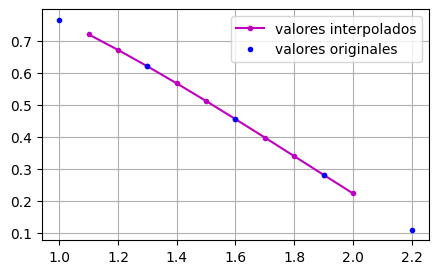

In [ ]:
#b)
plt.figure(figsize=(5,3))
plt.plot(new_x_range, poli(new_x_range), '.m-', label='valores interpolados')#valores interpolados con la grange
plt.plot(df['x'],df['f(x)'], '.b', label= 'valores originales')
plt.legend()
plt.plot
plt.grid()

In [ ]:
#c) utilizando cubicspline
from scipy.interpolate import CubicSpline
poli_cubic= CubicSpline(df['x'],df['f(x)'])
new_x = np.arange(1.1, 2.1, 0.1)
poli_cubic(new_x)

array([0.71965512, 0.67115389, 0.620086  , 0.56684343, 0.51181817,
       0.4554022 , 0.39799079, 0.33999236, 0.2818186 , 0.2238812 ])

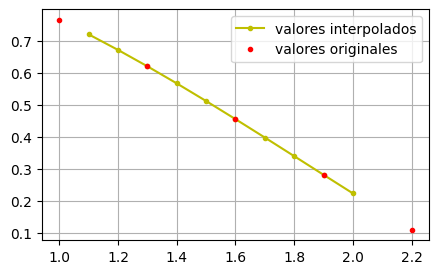

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(new_x, poli_cubic(new_x), '.y-', label='valores interpolados')#valores interpolados con CubicSpline
plt.plot(df['x'],df['f(x)'], '.r', label= 'valores originales')
plt.legend()
plt.plot
plt.grid()

Es claro que por el metodo de la grange y por el metodo de cubic spline, los valores no cambian

##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [ ]:
import urllib.request
pato='https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')#Decargar la imagen
imagen_pato=plt.imread('pato.jpg') #Variable con la imagen del pato

In [ ]:
x= [0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]
y= [1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]

In [ ]:
data = {'x':x, 'y':y}
df= pd.DataFrame(data)
df

,x,y
0,0.9,1.30
1,1.3,1.50
2,1.9,1.85
3,2.1,2.10
4,2.6,2.60
5,3.0,2.70
6,3.9,2.40
7,4.4,2.15
8,4.7,2.05
9,5.0,2.10


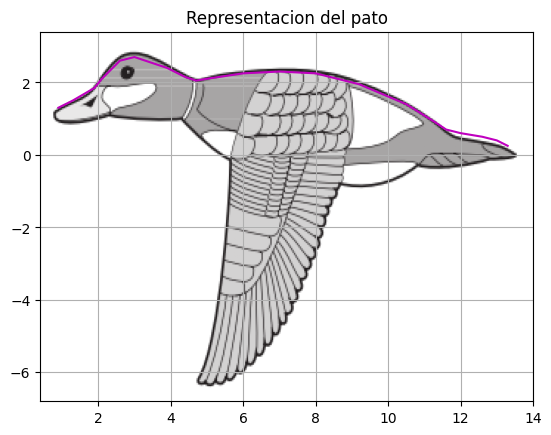

In [ ]:
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato,extent=(0.4,14,-6.8,3.4))
plt.plot(df['x'],df['y'],'m')
plt.grid()
#plt.xlim(0,14)
#plt.ylim()

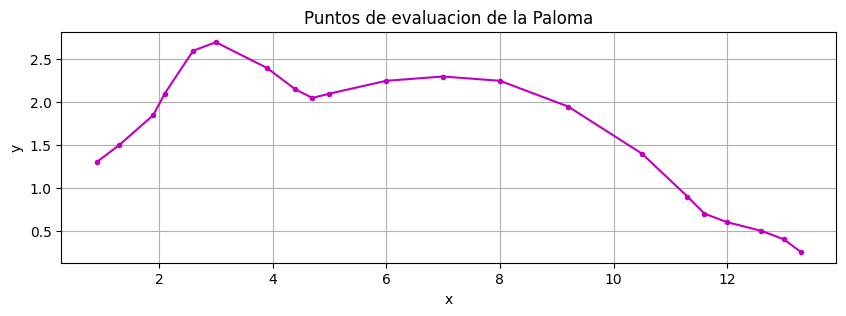

In [ ]:
#puntos de paloma
plt.figure(figsize =(10,3))
plt.title('Puntos de evaluacion de la Paloma')
plt.plot(df['x'],df['y'],'.m-')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [ ]:
#3) interpolacion de la grange
p_inter= lagrange(x,y)

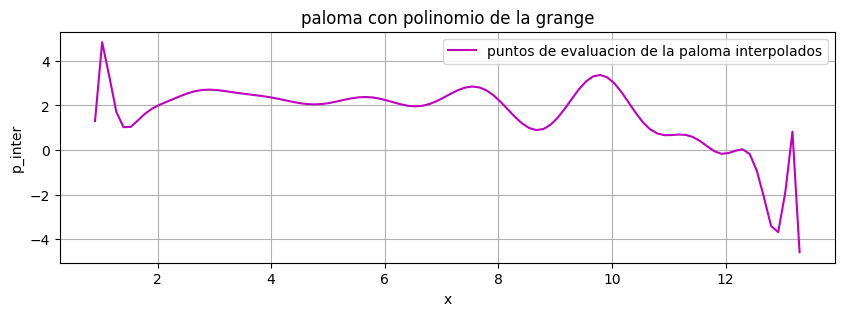

In [ ]:
x_intervalo= np.linspace(min(x),max(x),100)
plt.figure(figsize=(10,3))
plt.plot(x_intervalo,p_inter(x_intervalo), 'm', label='puntos de evaluacion de la paloma interpolados')
plt.title('paloma con polinomio de la grange')
plt.xlabel('x')
plt.ylabel('p_inter')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#4) interpolacion con cubic esplain
from scipy.interpolate import CubicSpline

p_cubic= CubicSpline(x,y)

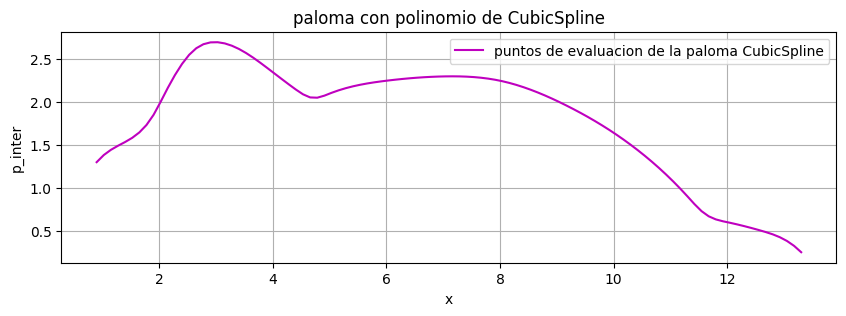

In [ ]:
x_inter= np.linspace(min(x),max(x),100)
plt.figure(figsize=(10,3))
plt.plot(x_inter,p_cubic(x_inter), 'm', label='puntos de evaluacion de la paloma CubicSpline')
plt.title('paloma con polinomio de CubicSpline')
plt.xlabel('x')
plt.ylabel('p_inter')
plt.legend()
plt.grid()
plt.show()